In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

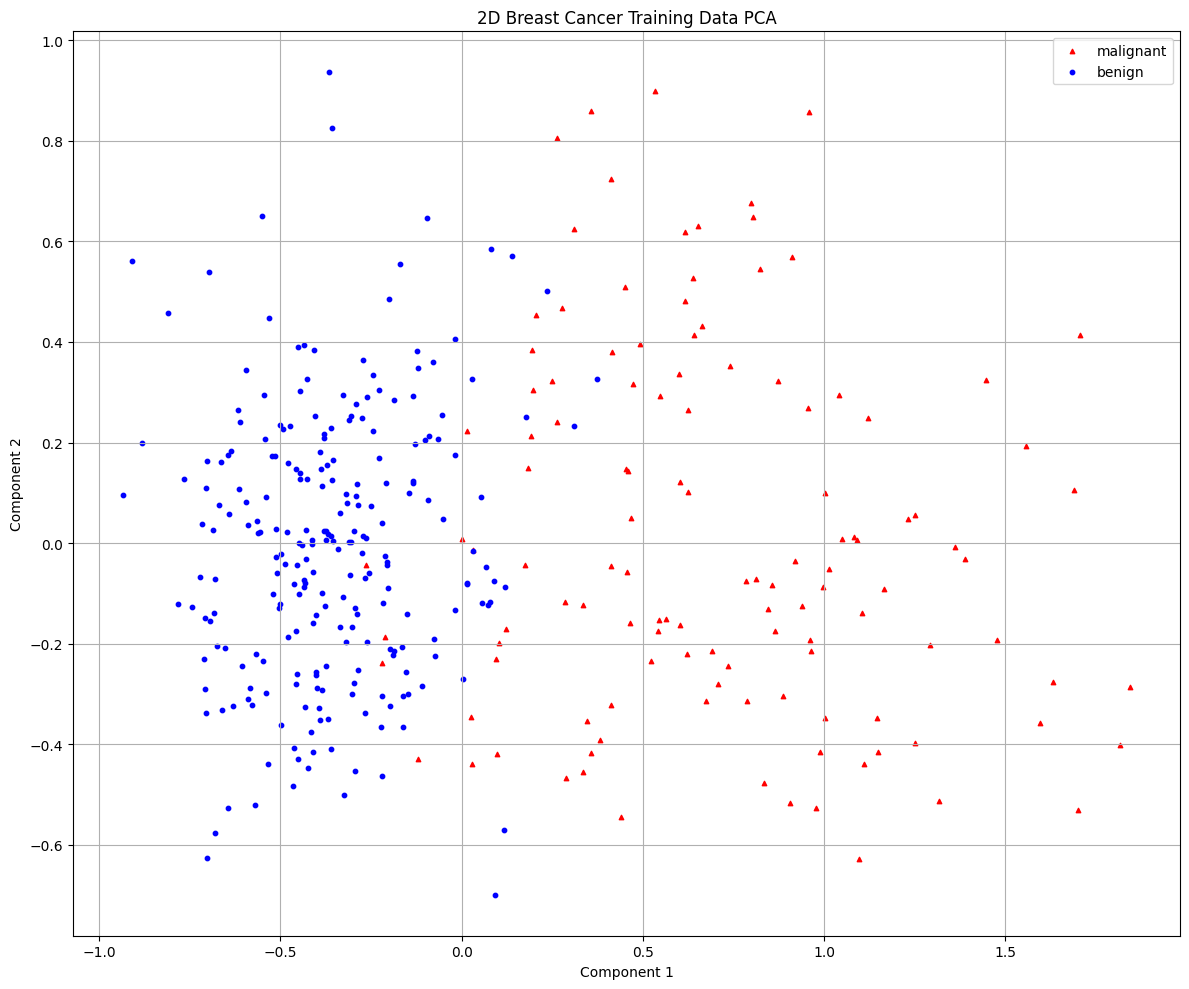

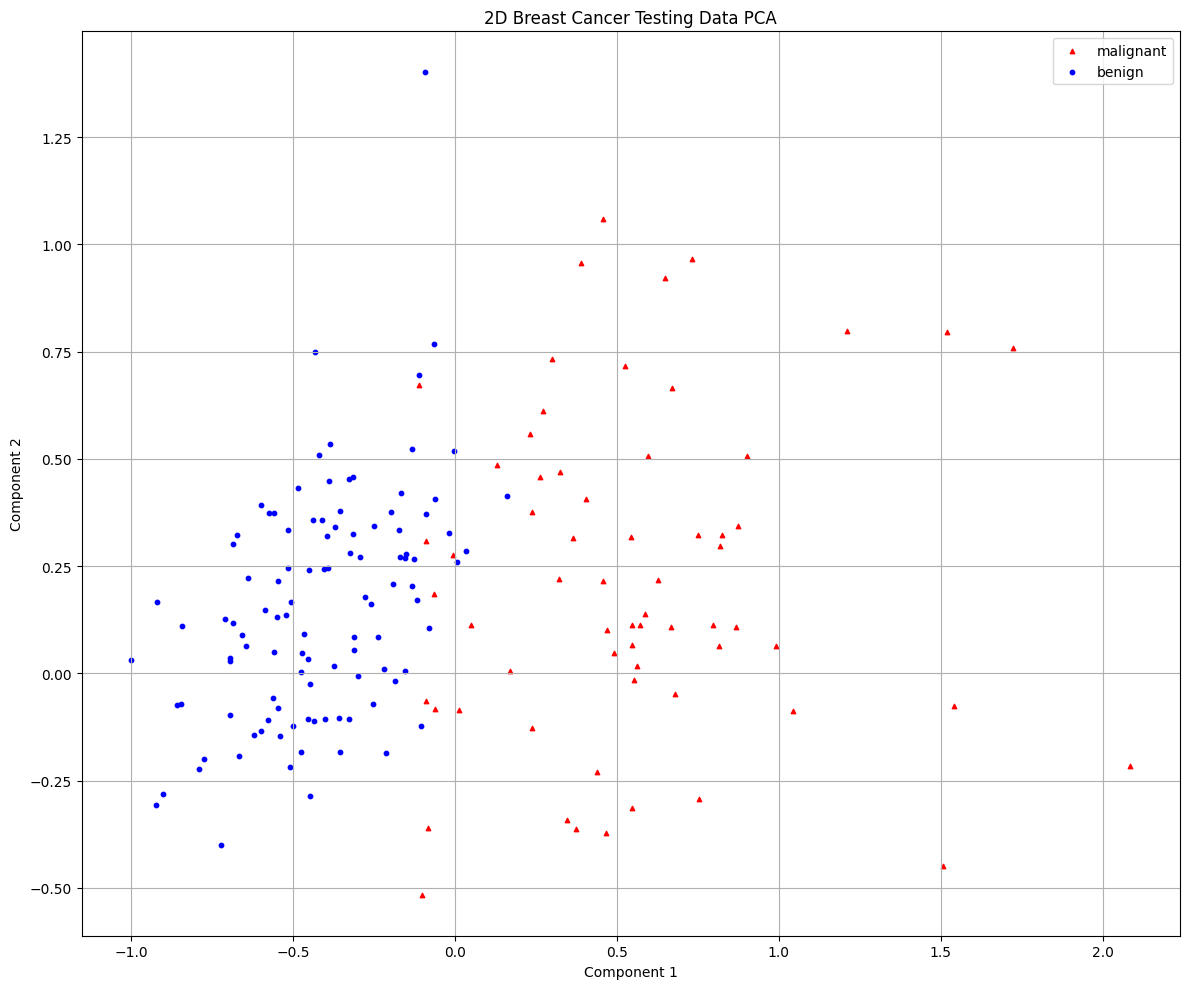

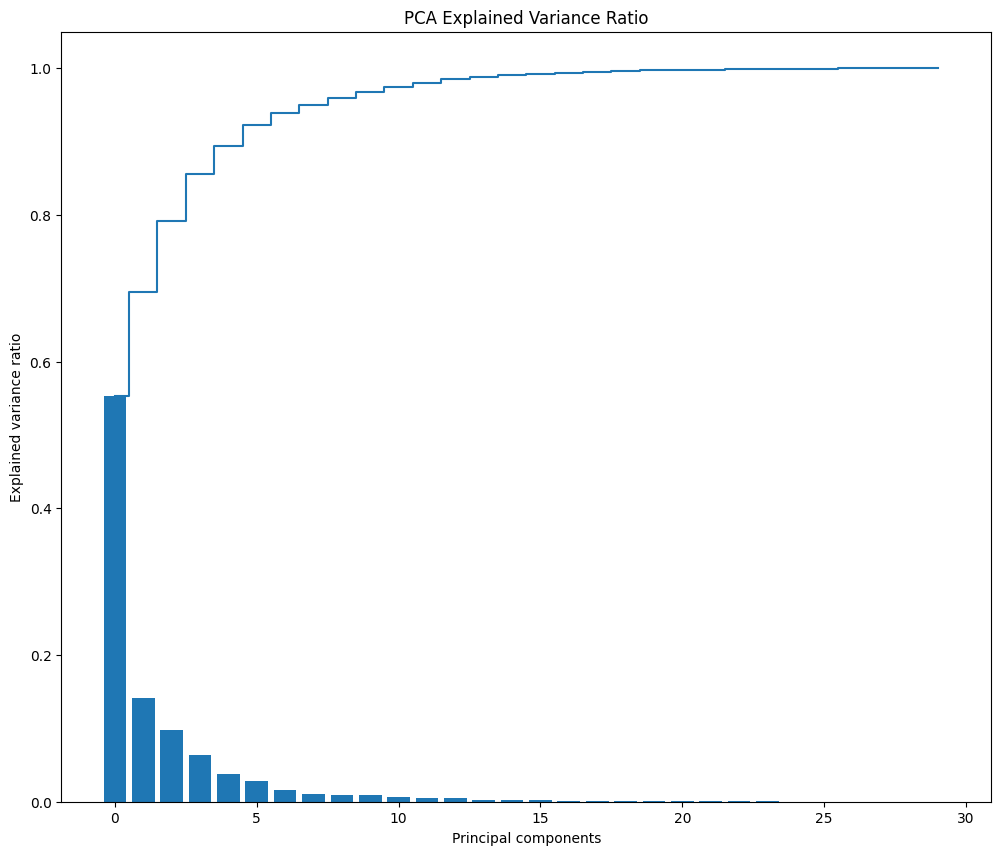

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

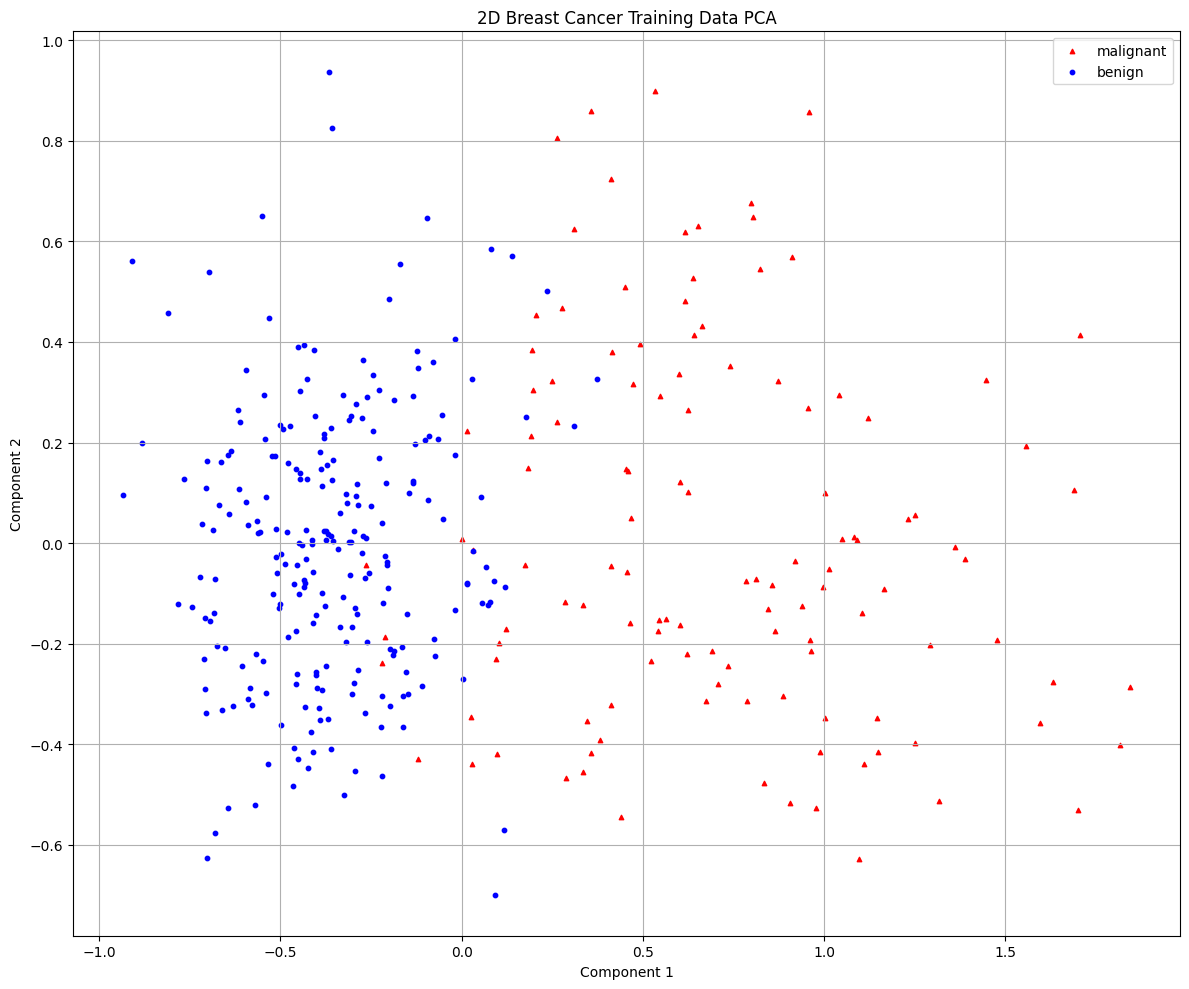

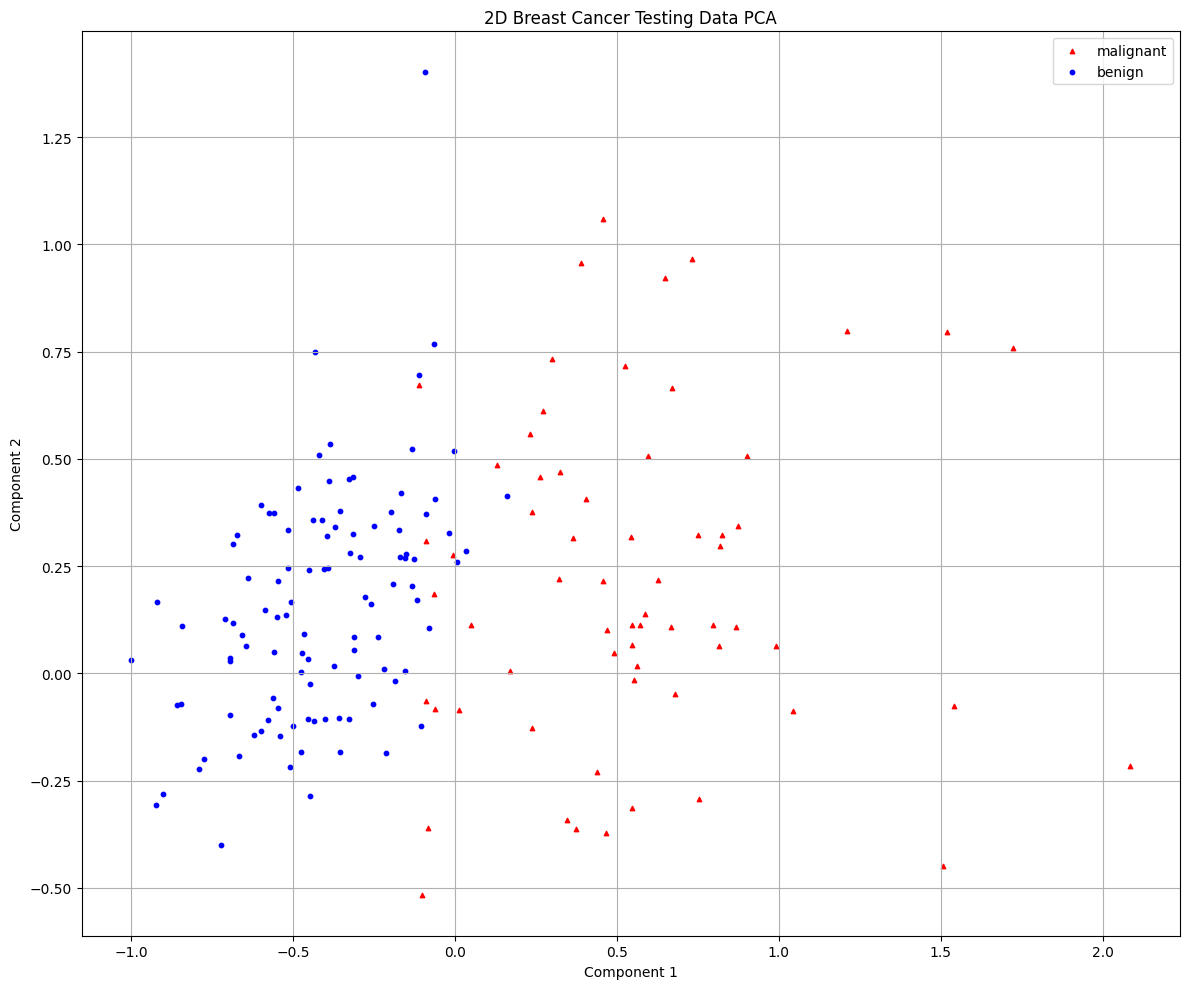

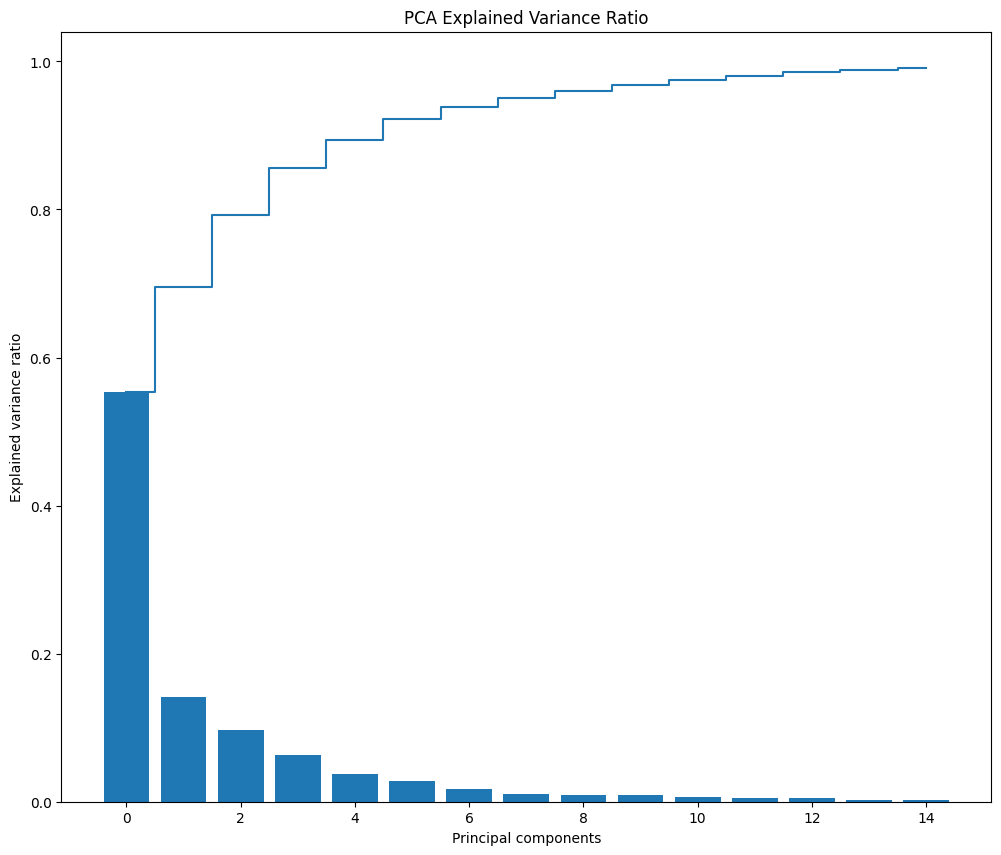

[I 2025-04-27 16:46:51,979] A new study created in memory with name: no-name-16e49774-96cc-435b-9ae7-414b88b0505f
[I 2025-04-27 16:47:09,664] Trial 0 finished with value: 0.9585616438356166 and parameters: {'n_estimators': 3751, 'max_depth': 15, 'learning_rate': 0.008929798708911186, 'subsample': 0.5671212517758156, 'colsample_bytree': 0.6820691688547562, 'gamma': 0.8365403587659354, 'reg_alpha': 3.3639795319035336e-08, 'reg_lambda': 0.0068659044355698804}. Best is trial 0 with value: 0.9585616438356166.
[I 2025-04-27 16:47:15,761] Trial 1 finished with value: 0.9502663622526637 and parameters: {'n_estimators': 351, 'max_depth': 14, 'learning_rate': 0.0013650282674439087, 'subsample': 0.979882420896935, 'colsample_bytree': 0.9537911037107074, 'gamma': 2.384291006369486, 'reg_alpha': 0.13562631068347805, 'reg_lambda': 0.38040083475705905}. Best is trial 0 with value: 0.9585616438356166.
[I 2025-04-27 16:48:00,025] Trial 2 finished with value: 0.9557458143074582 and parameters: {'n_estim

Best trial:
Accuracy: 0.9668949771689498
Best hyperparameters:  {'n_estimators': 2601, 'max_depth': 13, 'learning_rate': 0.23749516311026098, 'subsample': 0.7275922761005793, 'colsample_bytree': 0.8878147853473706, 'gamma': 2.6840842311562136, 'reg_alpha': 0.0028597644265147847, 'reg_lambda': 0.22516910075346633}


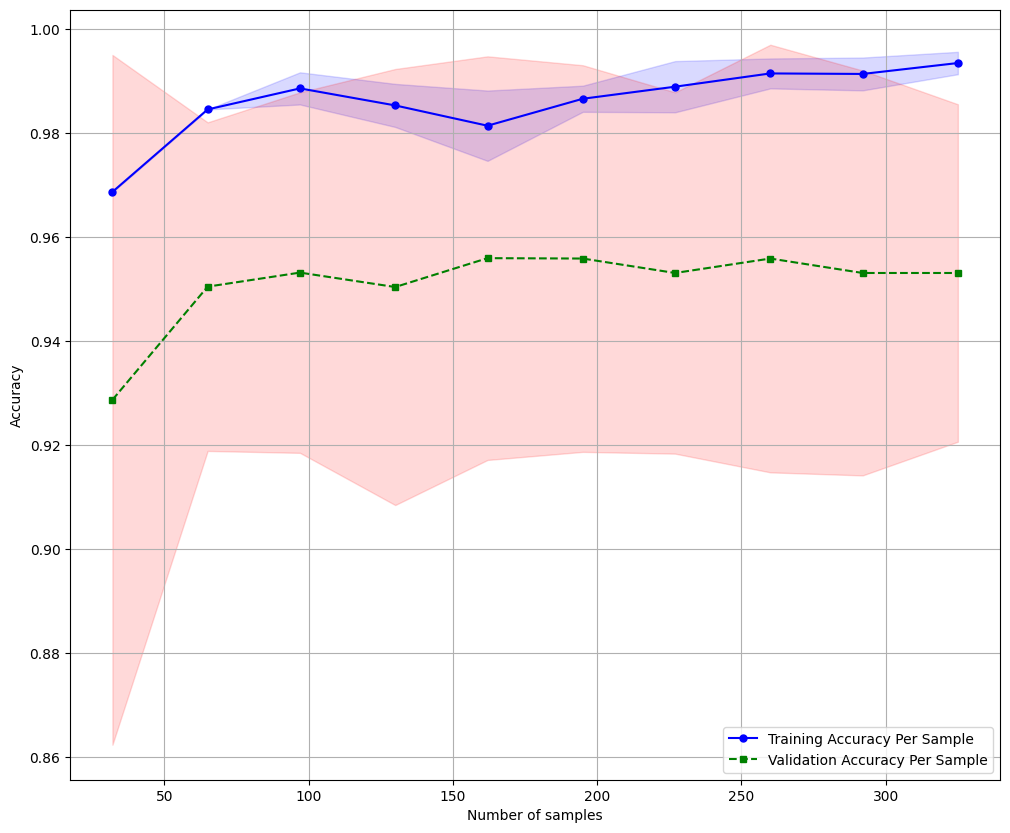

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC: 0.9886


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)